# CSCS

In [1]:
import numpy as np
import networkx as nx
from data_generate import generate_random_MVN_data
from CSCS import CSCS, CSCS_numba_fit

In [2]:
np.random.seed(3689)

In [3]:
Y = generate_random_MVN_data(p = 500, a = 0.5, b = 1, diag_a= 0.99, diag_b=1.01,plot = True)

## Numba 

In [5]:
%timeit L = CSCS_numba_fit(Y=Y,l = 1)


126 µs ± 7.51 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [13]:
L = CSCS_numba_fit(Y=Y,l = 0.25)

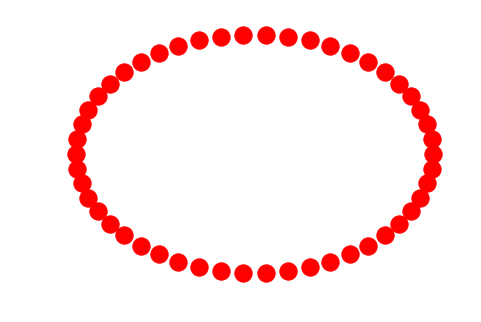

In [14]:
A = (L!=0)*1.0
G=nx.from_numpy_matrix(A.T, create_using=nx.DiGraph())
nx.draw_shell(G, with_labels=False, font_weight='bold')

## Parallel implementation with 3 workers

In [14]:
cscs = CSCS(Y = Y,l = 1, num_workers=3)

In [15]:
%timeit L,A,G = cscs.fit()

12.3 s ± 309 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Serial implementation with 1 worker 

In [16]:
cscs = CSCS(Y = Y,l = 1, num_workers=1)

In [17]:
%timeit L,A,G = cscs.fit()

11.7 s ± 785 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Numba implementation performs the fastest!

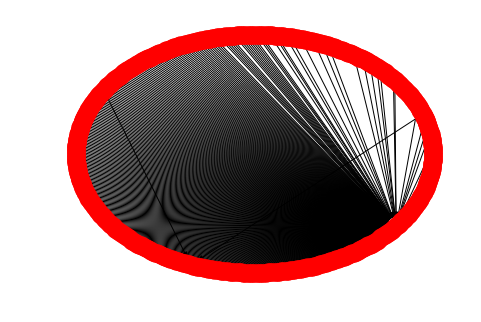

In [33]:
cscs = CSCS(Y = Y,l = 2.1872, num_workers=3)
L,A,G = cscs.fit()
nx.draw_shell(G, with_labels=False, font_weight='bold')